In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [2]:
check_file = pd.read_csv("../clean_data/combined_final_data.csv")

In [3]:
# , parse_dates=[0], format="%Y-%m-%d%H:%M:%S%z")

In [4]:
check_file.head()

,Unnamed: 0,num_pickups,num_passengers,holiday,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,Passengers,Month,Hour,Day
0,2014-01-01 00:00:00-05:00,107,210.0,True,269.27,267.59,270.93,1026.0,80.0,3.0,313.0,Clear,Sky is Clear,108,1,0,2
1,2014-01-01 01:00:00-05:00,34,45.0,False,268.90,267.04,270.93,1026.0,80.0,2.0,293.0,Clear,Sky is Clear,0,1,1,2
2,2014-01-01 02:00:00-05:00,34,70.0,False,268.48,266.48,270.37,1026.0,57.0,3.0,244.0,Clear,Sky is Clear,0,1,2,2
3,2014-01-01 03:00:00-05:00,12,18.0,False,268.33,265.93,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,3,2
4,2014-01-01 04:00:00-05:00,25,37.0,False,268.10,265.37,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,4,2


In [5]:
check_file.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
check_file.dtypes

num_pickups              int64
num_passengers         float64
holiday                   bool
temp                   float64
temp_min               float64
temp_max               float64
pressure               float64
humidity               float64
wind_speed             float64
wind_deg               float64
weather_main            object
weather_description     object
Passengers               int64
Month                    int64
Hour                     int64
Day                      int64
dtype: object

In [7]:
check_file.rename(columns={'Unnamed: 0':'Datetime'}, inplace=True)

In [8]:
check_file.head()

,num_pickups,num_passengers,holiday,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description,Passengers,Month,Hour,Day
0,107,210.0,True,269.27,267.59,270.93,1026.0,80.0,3.0,313.0,Clear,Sky is Clear,108,1,0,2
1,34,45.0,False,268.90,267.04,270.93,1026.0,80.0,2.0,293.0,Clear,Sky is Clear,0,1,1,2
2,34,70.0,False,268.48,266.48,270.37,1026.0,57.0,3.0,244.0,Clear,Sky is Clear,0,1,2,2
3,12,18.0,False,268.33,265.93,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,3,2
4,25,37.0,False,268.10,265.37,270.37,1024.0,80.0,3.0,244.0,Clear,Sky is Clear,0,1,4,2


In [9]:
categorical_vars = check_file.describe(include=["object"]).columns
continuous_vars = check_file.describe().columns

In [10]:
categorical_vars

Index(['weather_main', 'weather_description'], dtype='object')

In [11]:
continuous_vars

Index(['num_pickups', 'num_passengers', 'temp', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'Passengers', 'Month',
       'Hour', 'Day'],
      dtype='object')

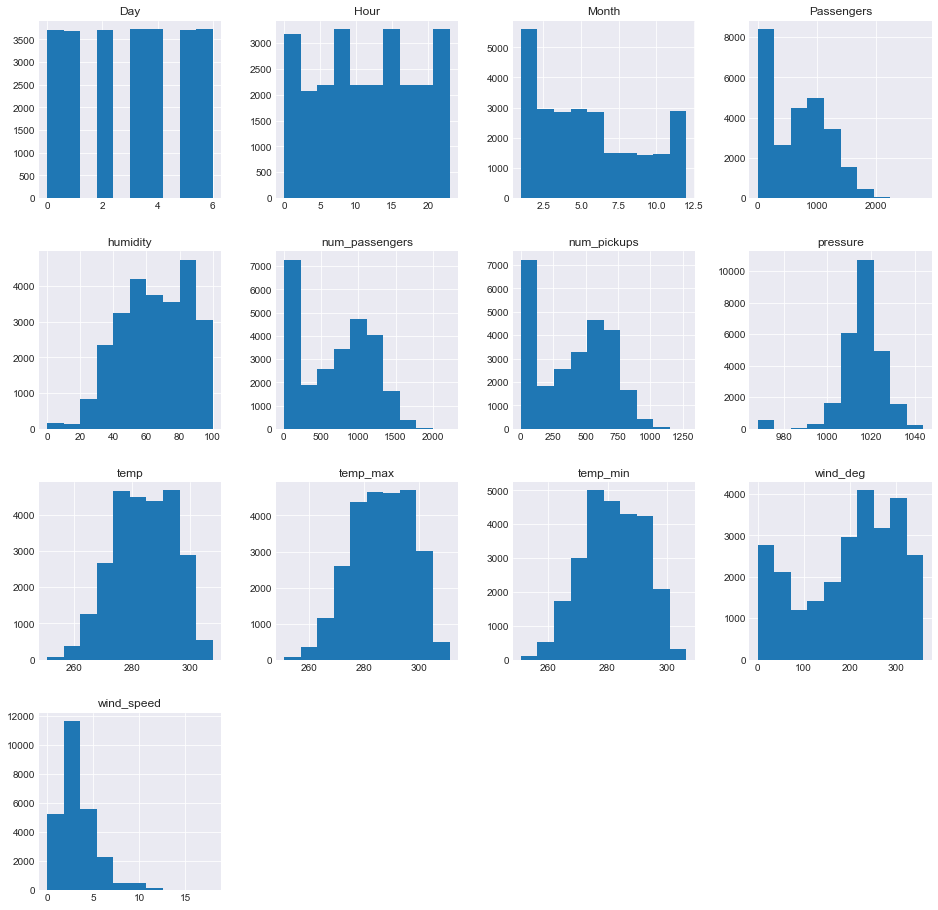

In [12]:
_ = check_file.hist(column=continuous_vars, figsize = (16,16))

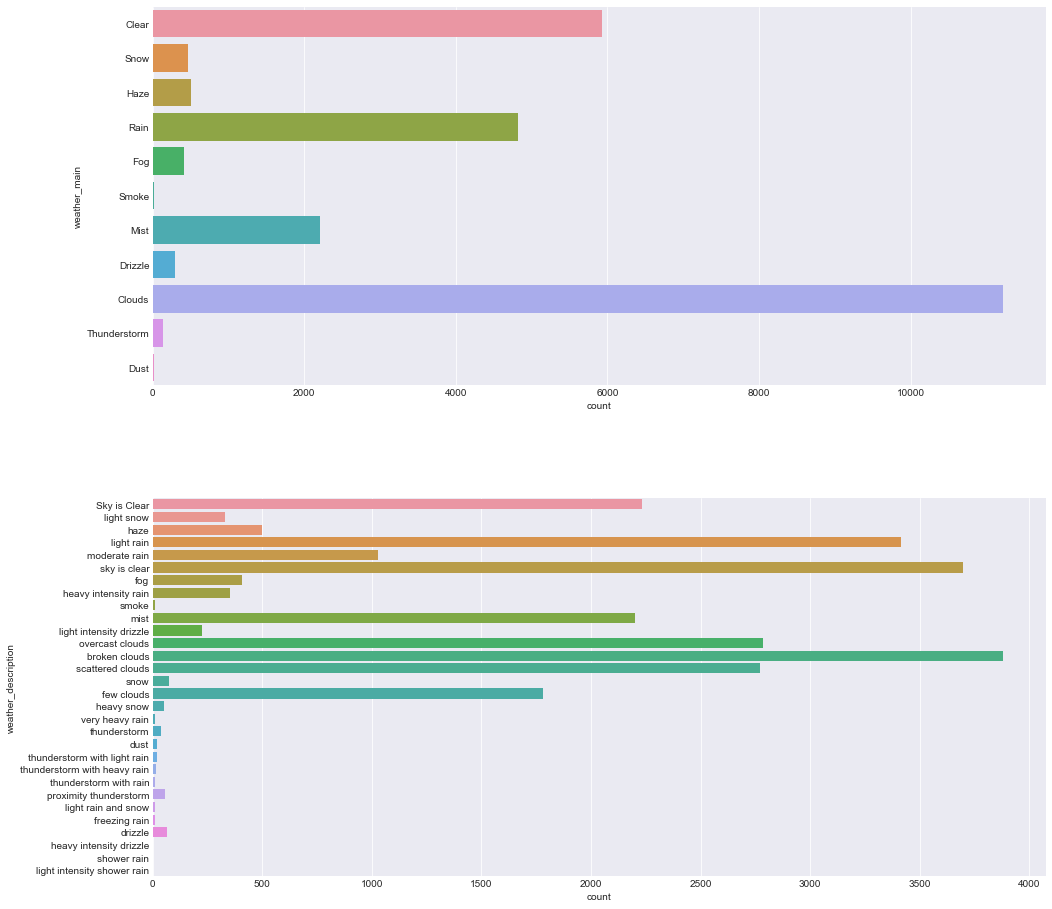

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 1:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=check_file, ax=ax)

In [14]:
#pd.tools.plotting.scatter_matrix(check_file[continuous_vars], alpha=.2, figsize=(15, 15), cmap="viridis");


In [15]:
data_dummies_df = pd.get_dummies(check_file, columns=categorical_vars, drop_first=True)

In [16]:
data_dummies_df.head()

,num_pickups,num_passengers,holiday,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,107,210.0,True,269.27,267.59,270.93,1026.0,80.0,3.0,313.0,...,0,0,0,0,0,0,0,0,0,0
1,34,45.0,False,268.90,267.04,270.93,1026.0,80.0,2.0,293.0,...,0,0,0,0,0,0,0,0,0,0
2,34,70.0,False,268.48,266.48,270.37,1026.0,57.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0
3,12,18.0,False,268.33,265.93,270.37,1024.0,80.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0
4,25,37.0,False,268.10,265.37,270.37,1024.0,80.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_dummies_df["holiday"] = data_dummies_df.holiday.astype("int")

In [18]:
data_dummies_df.head()

,num_pickups,num_passengers,holiday,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,107,210.0,1,269.27,267.59,270.93,1026.0,80.0,3.0,313.0,...,0,0,0,0,0,0,0,0,0,0
1,34,45.0,0,268.90,267.04,270.93,1026.0,80.0,2.0,293.0,...,0,0,0,0,0,0,0,0,0,0
2,34,70.0,0,268.48,266.48,270.37,1026.0,57.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0
3,12,18.0,0,268.33,265.93,270.37,1024.0,80.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0
4,25,37.0,0,268.10,265.37,270.37,1024.0,80.0,3.0,244.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
num_pickups = data_dummies_df.num_pickups

In [20]:
data_dummies_df.drop("num_pickups", axis=1, inplace=True)
data_dummies_df.drop("num_passengers", axis=1, inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies_df, num_pickups, random_state=0, test_size=0.1)

### Ridge Regression

In [24]:
param_grid = {'ridge__alpha': np.logspace(-3, 3, 14)}
pipe = make_pipeline(StandardScaler(), Ridge())
# print(param_grid)

In [25]:
grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 14.251026703029993}
0.509968877669


### Ridge : Polynomial

In [27]:
param_grid = {'ridge__alpha': np.logspace(-3, 3, 14)}
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(include_bias=False),  Ridge())
# print(param_grid)

In [28]:
grid = RandomizedSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

### Lasso Regression

In [32]:
param_grid = {'lasso__alpha': np.logspace(-4, 0, 14)}
pipe = make_pipeline(StandardScaler(), Lasso(normalize=True, max_iter=1e6))
print(param_grid)

{'lasso__alpha': array([  1.00000000e-04,   2.03091762e-04,   4.12462638e-04,
         8.37677640e-04,   1.70125428e-03,   3.45510729e-03,
         7.01703829e-03,   1.42510267e-02,   2.89426612e-02,
         5.87801607e-02,   1.19377664e-01,   2.42446202e-01,
         4.92388263e-01,   1.00000000e+00])}


In [33]:
grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lasso__alpha': array([  1.00000e-04,   2.03092e-04,   4.12463e-04,   8.37678e-04,
         1.70125e-03,   3.45511e-03,   7.01704e-03,   1.42510e-02,
         2.89427e-02,   5.87802e-02,   1.19378e-01,   2.42446e-01,
         4.92388e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'lasso__alpha': 0.00083767764006829242}
0.510002298307
